 ## HW4 - EuroSAT Land Use and Land Cover Classification using Deep Learning
 
In this homework your task is to implement deep learning models to solve a typical problem in satellite imaging  using a benchmark dataset. The homework was designed to make you work on increasingly more complex models. We hope that the homework will be very helpful to improve your skills and knowledge in deep learning!


### S1:

- Visit the EuroSAT data description page and download the data: https://github.com/phelber/eurosat

- Split the data into training (50%) and testing sets (50%), stratified on class labels (equal percentage of each class type in train and test sets).

- Convert each RGB image to grayscale and flatten the images into a data matrix (n x p: n = #samples, p = #pixels in each image)


In [2]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

In [3]:
#load data from local path
dataset = "C:/Users/kchan/Desktop/Spring2022/RemoteSensing/HW/HW4/EuroSAT/2750"

#create array of unique labels
labelNames = os.listdir(dataset)
labelNames

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [4]:

#number of labels
numClass = len(labelNames)
numClass

10

In [5]:
#number of images per class
lenClass = np.zeros(numClass)
for i in np.arange(0, numClass):
    lenClass[i] = len(os.listdir(dataset + '/' + labelNames[i]))

lenClass

array([3000., 3000., 3000., 2500., 2500., 2000., 2500., 3000., 2500.,
       3000.])

In [6]:
#total number of images
numImgs = int(lenClass.sum())
numImgs

27000

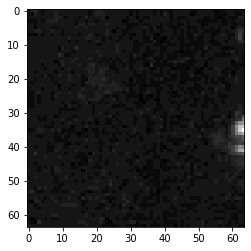

In [7]:
#plot one image
import PIL
from PIL import Image, ImageOps

imgSel = dataset + '/' + labelNames[i] + '/' + os.listdir(dataset + '/' + labelNames[i])[9]
og_image = Image.open(imgSel)
img_gray = ImageOps.grayscale(og_image)
plt.imshow(img_gray, cmap='gray')
#img_gray.save('test_gray.jpg')

In [8]:
#shape of this image
np.asarray(img_gray).shape

(64, 64)

In [9]:
#total number of pixels per image

numPixels = np.prod(np.asarray(img_gray).shape)
numPixels

4096

In [10]:
#extract color channels from each image and flatten to a matrix
X = np.zeros([numImgs, numPixels])

#create labels matrix 
y = np.zeros(numImgs)

In [11]:
from skimage import color
from skimage import io

#load rest of images
imgInd = 0
for i in np.arange(0, numClass):
  className = labelNames[i]
  for imgName in os.listdir(dataset + '/' + className):
    img = PIL.Image.open(dataset + '/' + className + '/' + imgName, 'r')
    img = color.rgb2gray(io.imread('EuroSAT/2750/' + className + '/' + imgName))
    imgVec = np.asarray(img).flatten()
    X[imgInd,:] = imgVec
    y[imgInd] = i
    imgInd = imgInd + 1
    #print('Read img class ' + className + ' no ' + str(imgInd))

In [11]:
#shape of X before splitting
X.shape

(27000, 4096)

In [12]:
#shape of y before splitting
y.shape

(27000,)

In [13]:
#split data 50% train 50% test with equal distributions of labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42, stratify=y)

### S2:

- Implement a first deep learning model (M.1) using a fully connected network with a single fully connected layer (i.e: input layer + fully connected layer as the output layer). 

Q2.1: Calculate classification accuracy on the test data.  

In [14]:
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [15]:
#set global parameters
batch_size = 64
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 64, 64

In [16]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [17]:
#create first simple CNN model
m1 = Sequential()
m1.add(Dense(num_classes, activation='softmax', input_shape=(4096,)))

In [18]:
m1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [19]:
m1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 1s 4ms/step - loss: 2.3475 - accuracy: 0.1167 - val_loss: 2.3158 - val_accuracy: 0.1306
Epoch 2/12
211/211 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1267 - val_loss: 2.2911 - val_accuracy: 0.0995
Epoch 3/12
211/211 [==============================] - 1s 3ms/step - loss: 2.2870 - accuracy: 0.1073 - val_loss: 2.2834 - val_accuracy: 0.1080
Epoch 4/12
211/211 [==============================] - 1s 3ms/step - loss: 2.2826 - accuracy: 0.1083 - val_loss: 2.2812 - val_accuracy: 0.1098
Epoch 5/12
211/211 [==============================] - 1s 3ms/step - loss: 2.2814 - accuracy: 0.1082 - val_loss: 2.2805 - val_accuracy: 0.1104
Epoch 6/12
211/211 [==============================] - 1s 3ms/step - loss: 2.2808 - accuracy: 0.1092 - val_loss: 2.2801 - val_accuracy: 0.1113
Epoch 7/12
211/211 [==============================] - 1s 4ms/step - loss: 2.2803 - accuracy: 0.1103 - val_loss: 2.2796 - val_accuracy: 0.1122
Epoch 

#### Q2.1 Classification Accuracy using the test set: 

In [20]:
score = m1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2773990631103516
Test accuracy: 0.11496296525001526


### S3:

- Implement a second deep learning model (M.2) adding an additional fully connected hidden layer (with an arbitrary number of nodes) to the previous model. 

Q3.1: Calculate classification accuracy on the test data.  

In [21]:
m2 = Sequential()
m2.add(Dense(1050, activation='relu', input_shape=(4096,)))
m2.add(Dense(num_classes, activation='softmax'))

m2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1050)              4301850   
                                                                 
 dense_2 (Dense)             (None, 10)                10510     
                                                                 
Total params: 4,312,360
Trainable params: 4,312,360
Non-trainable params: 0
_________________________________________________________________


In [22]:
m2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [23]:
m2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 5s 22ms/step - loss: 2.2923 - accuracy: 0.1116 - val_loss: 2.2665 - val_accuracy: 0.1154
Epoch 2/12
211/211 [==============================] - 4s 21ms/step - loss: 2.2614 - accuracy: 0.1196 - val_loss: 2.2557 - val_accuracy: 0.1244
Epoch 3/12
211/211 [==============================] - 5s 22ms/step - loss: 2.2526 - accuracy: 0.1270 - val_loss: 2.2486 - val_accuracy: 0.1365
Epoch 4/12
211/211 [==============================] - 4s 21ms/step - loss: 2.2461 - accuracy: 0.1358 - val_loss: 2.2430 - val_accuracy: 0.1385
Epoch 5/12
211/211 [==============================] - 4s 21ms/step - loss: 2.2404 - accuracy: 0.1415 - val_loss: 2.2380 - val_accuracy: 0.1443
Epoch 6/12
211/211 [==============================] - 5s 22ms/step - loss: 2.2350 - accuracy: 0.1464 - val_loss: 2.2334 - val_accuracy: 0.1463
Epoch 7/12
211/211 [==============================] - 5s 25ms/step - loss: 2.2307 - accuracy: 0.1528 - val_loss: 2.2291 - val_accuracy: 0.1488

#### Q3.1 Classification Accuracy using test set: 

In [24]:
score = m2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2138736248016357
Test accuracy: 0.15355555713176727


### S4:

- Implement a third deep learning model (M.3) adding two additional fully connected hidden layers (with arbitrary number of nodes) for a total of four, as well as drop-out layers to the previous model. 

Q4.1: Calculate classification accuracy on the test data.

Q4.2: Compare against previous models. Which model was the "best"? Why?

In [25]:
m3 = Sequential()
m3.add(Dense(950, activation='relu', input_shape=(4096,)))
m3.add(Dropout(0.5))
m3.add(Dense(1000, activation='relu'))
m3.add(Dropout(0.5))
m3.add(Dense(1050, activation='relu'))
m3.add(Dropout(0.5))
m3.add(Dense(num_classes, activation='softmax'))

m3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 950)               3892150   
                                                                 
 dropout (Dropout)           (None, 950)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)              951000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1050)              1051050   
                                                                 
 dropout_2 (Dropout)         (None, 1050)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [26]:
m3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [27]:
m3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 8s 37ms/step - loss: 2.4358 - accuracy: 0.1028 - val_loss: 2.2767 - val_accuracy: 0.1165
Epoch 2/12
211/211 [==============================] - 7s 33ms/step - loss: 2.3818 - accuracy: 0.1058 - val_loss: 2.2733 - val_accuracy: 0.1395
Epoch 3/12
211/211 [==============================] - 7s 34ms/step - loss: 2.3512 - accuracy: 0.1130 - val_loss: 2.2728 - val_accuracy: 0.1344
Epoch 4/12
211/211 [==============================] - 8s 38ms/step - loss: 2.3416 - accuracy: 0.1073 - val_loss: 2.2715 - val_accuracy: 0.1304
Epoch 5/12
211/211 [==============================] - 7s 35ms/step - loss: 2.3279 - accuracy: 0.1064 - val_loss: 2.2700 - val_accuracy: 0.1301
Epoch 6/12
211/211 [==============================] - 7s 34ms/step - loss: 2.3133 - accuracy: 0.1119 - val_loss: 2.2683 - val_accuracy: 0.1316
Epoch 7/12
211/211 [==============================] - 7s 35ms/step - loss: 2.3128 - accuracy: 0.1054 - val_loss: 2.2666 - val_accuracy: 0.1322

#### Q4.1 Classification Accuracy using test set:

In [28]:
score = m3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2584211826324463
Test accuracy: 0.14807407557964325


#### Q4.2 Which model is "best"? 

Models 2 and 3 performed significantly better than model 1, with model 2 performing the "best" in terms of both accuracy and loss scores. In this notebook, these models become increasingly complex by adding a new dense layer each time. Each neuron in a dense layer uses the output from all of the neurons in the previous layer as its input. While this technique can fine tune a model to identify variations, having multiple dense connections may lead to overfitting. This is one potential reason why model 2 performs slightly better than model 3 with the test set data. If we wanted to improve model 3, we could add a dropout layer as a regularization technique so that it would generalize better to the test set data. 

### S5:

- Take the original RGB images and do not vectorize them. Use these images as the data input for the following models (M.4 and M.5).
- Implement a fourth CNN model (M.4) that includes the following layers: Conv2D, MaxPooling2D, Dropout, Flatten, Dense. 

Q5.1: Calculate classification accuracy on the test data.

Q5.2: Compare against previous models. Which model was the "best"? Why?

In [118]:
# reading the data in again to retain rgb
import glob
import os
img_files = []
for file in glob.glob(dataset + os.sep + "*" + os.sep + "*.jpg"):
  img_files.append(file)

In [119]:
# load RGB images
imgs_rgb = []
for imgName in img_files:
  temp = io.imread(imgName)
  imgs_rgb.append(temp) #append to the feature data set

In [120]:
np.asarray(imgs_rgb).shape

(27000, 64, 64, 3)

In [121]:
images = np.stack(imgs_rgb)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,y,test_size=0.5, random_state=42, stratify=y)

In [123]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X_train.reshape(X_train.shape[0], -1))
X_train = scalar.transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scalar.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

In [124]:
input_shape =(64,64,3)

In [36]:
m4 = Sequential()
m4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
m4.add(MaxPooling2D(pool_size=(2, 2)))
m4.add(Dropout(0.25))
m4.add(Flatten())
m4.add(Dense(num_classes, activation='softmax'))

m4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                307530    
                                                                 
Total params: 308,426
Trainable params: 308,426
Non-trainable params: 0
________________________________________________

In [37]:
m4.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [38]:
m4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 15s 72ms/step - loss: 2.2780 - accuracy: 0.0859 - val_loss: 2.2441 - val_accuracy: 0.0857
Epoch 2/12
211/211 [==============================] - 15s 72ms/step - loss: 2.2355 - accuracy: 0.1039 - val_loss: 2.2210 - val_accuracy: 0.1179
Epoch 3/12
211/211 [==============================] - 17s 79ms/step - loss: 2.2188 - accuracy: 0.1180 - val_loss: 2.2097 - val_accuracy: 0.1378
Epoch 4/12
211/211 [==============================] - 16s 74ms/step - loss: 2.2097 - accuracy: 0.1301 - val_loss: 2.2006 - val_accuracy: 0.1483
Epoch 5/12
211/211 [==============================] - 14s 68ms/step - loss: 2.2016 - accuracy: 0.1351 - val_loss: 2.1916 - val_accuracy: 0.1554
Epoch 6/12
211/211 [==============================] - 14s 67ms/step - loss: 2.1914 - accuracy: 0.1479 - val_loss: 2.1821 - val_accuracy: 0.1649
Epoch 7/12
211/211 [==============================] - 16s 74ms/step - loss: 2.1800 - accuracy: 0.1579 - val_loss: 2.1725 - val_accuracy:

#### Q5.1 Classification Accuracy using test set:

In [39]:
score = m4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1189088821411133
Test accuracy: 0.23577778041362762


#### Q5.2 Which model is "best"? 

Model 4 performs the "best" in terms of accuracy and loss scores. By not vectorizing the data, we are able to apply the model directly to the images allowing us to add layers like 2D convolution and 2D max pooling. Both of these layers downsample each image in the dataset while calculating weights using filters to learn which features to extract in the input images. This adds more granularity to the model which helps minimize loss and increases accuracy. 

### S6:

- Using RGB images from S5, implement a fifth deep learning model (M.5) targeting accuracy that will outperform all previous models. You are free to use any tools and techniques, as well as pre-trained models for transfer learning. 

Q6.1: Describe the model you built, and why you chose it.

Q6.2: Calculate classification accuracy on the test data.

Q6.3: Compare against previous models. Which model was the "best"? Why?

Q6.4: What are the two classes with the highest labeling error? Explain using data and showing mis-classified examples.

In [40]:
from tensorflow.keras.layers import BatchNormalization

In [125]:
m5 = Sequential()
m5.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),input_shape=input_shape))
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(MaxPooling2D((2,2)))

m5.add(Conv2D(64, (3,3), strides=(1,1)))
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(MaxPooling2D(pool_size=(2, 2)))

m5.add(Dropout(0.25))
m5.add(Flatten())

m5.add(Dense(num_classes, activation='softmax'))

m5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 29, 29, 64)      

In [126]:
m5.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [127]:
m5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 43s 203ms/step - loss: 1.4601 - accuracy: 0.5800 - val_loss: 5.5114 - val_accuracy: 0.1226
Epoch 2/12
211/211 [==============================] - 44s 209ms/step - loss: 0.9355 - accuracy: 0.7040 - val_loss: 6.3228 - val_accuracy: 0.1906
Epoch 3/12
211/211 [==============================] - 41s 193ms/step - loss: 0.7630 - accuracy: 0.7567 - val_loss: 0.8992 - val_accuracy: 0.6949
Epoch 4/12
211/211 [==============================] - 40s 189ms/step - loss: 0.6364 - accuracy: 0.7920 - val_loss: 1.6136 - val_accuracy: 0.6054
Epoch 5/12
211/211 [==============================] - 41s 195ms/step - loss: 0.5722 - accuracy: 0.8130 - val_loss: 0.9976 - val_accuracy: 0.7365
Epoch 6/12
211/211 [==============================] - 41s 194ms/step - loss: 0.5402 - accuracy: 0.8204 - val_loss: 1.0917 - val_accuracy: 0.7132
Epoch 7/12
211/211 [==============================] - 40s 190ms/step - loss: 0.4335 - accuracy: 0.8513 - val_loss: 0.7035 - val_ac

#### Q6.1 Why I chose this model:

The model I built is a densely connected neural network consisting of two 2D convolution modules. Module 1 uses 64 output filters with a kernel size of (3,3) and the relu activation function. Module 2 uses 32 output filters with a kernel size of (3,3) and the same activation function. Both modules contain 2D max pooling layers that take the max value over an input window of (2,2). I chose this model based on the accuracy and loss scores of model 4 that utilized both a 2D convolution and 2D max pooling layer. This technique seemed to perform well and I wanted to extract more features to identify variations by applying the second module. I originally used 64 output filters in both module 1 and module 2, but that yielded unsatisfactory results with the test set as the model was overfit to the training set. 

To stabilize the learning process, I also used BatchNormalization() that accelerates training and provides some regularization. This function applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. 

I experimented with adding a second dense layer with a dropout layer, but this did not help the model improve either.

Lastly, I used an Adam optimizer which is known to be better in terms of generalizeability - per my research. 

My goal for this section was to hypertune the model such that many significant features were extracted while optimzing the model for generalization as previous models did not seem to perform well in this way. The results of this model are printed below. 

#### Q6.2 Classification Accuracy using test set:

In [128]:
score = m5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9619234800338745
Test accuracy: 0.7617037296295166


#### Q6.3 Which model is best?

Model 5 performs significantly better than previous models in both loss and accuracy scores. This is because the model is able to extract more significant features using two convolution modules allowing deeper learning. Additionally, the Adam optimizer, and batch normalization steps allow for the model to have improved generalizeability to new data.

#### Q6.4 Two Classes with highest labeling error (with examples):

In [131]:
#create preds var
m5_results = m5.predict(X_test)
y_preds = np.argmax(m5_results, axis=1)

In [132]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

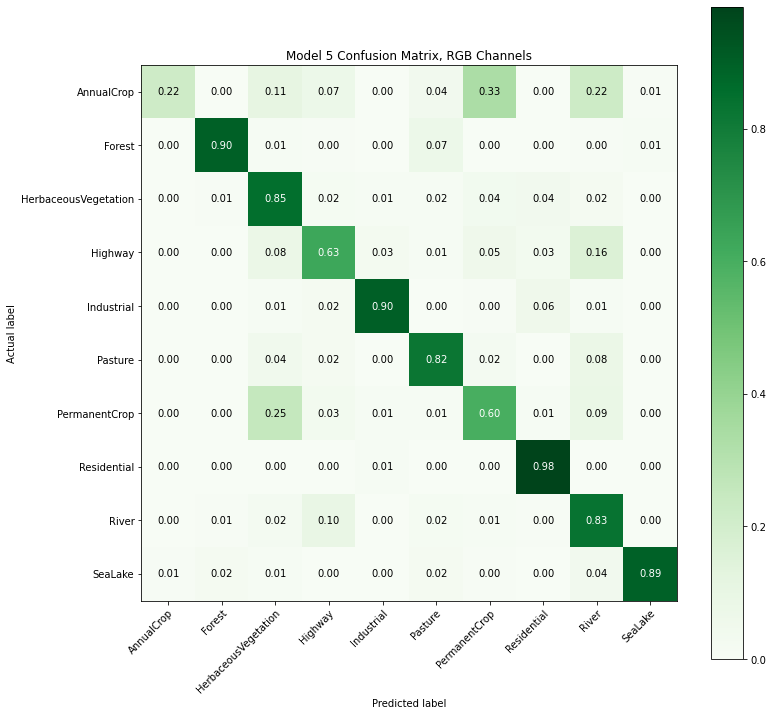

In [157]:
#plot confusion matrix
%matplotlib inline
plt.rcParams['axes.grid'] = False
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

#show all ticks
ax.set(xticks = np.arange(cm.shape[1]),
       yticks = np.arange(cm.shape[0]),
       xticklabels = labelNames, yticklabels = labelNames,
       title = 'Model 5 Confusion Matrix, RGB Channels',
       ylabel = 'Actual label',
       xlabel = 'Predicted label')

#set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

#loop over dimensions and create annotations
fmt = '.2f'
thresh = cm.max()/2
for i in range(cm.shape[0]): 
    for h in range(cm.shape[1]):
        ax.text( h, i, format(cm[i, h], fmt),
        ha = "center", va="center",
        color = "white" if cm[i, h] > thresh else "black");

Q6.4 Two classes with highest labeling error: "AnnualCrop" and "PermanentCrop"

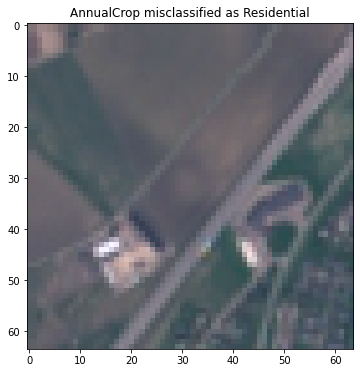

In [140]:
# example of "AnnualCrop" misclassified as "Residential"
plt.figure(figsize=(6,6))
misclass1 = np.where((y_test==0) & (y_preds == 7))[0][0]
misclass1_img = io.imread(img_files[misclass1])
plt.imshow(misclass1_img)
plt.title("AnnualCrop misclassified as Residential");

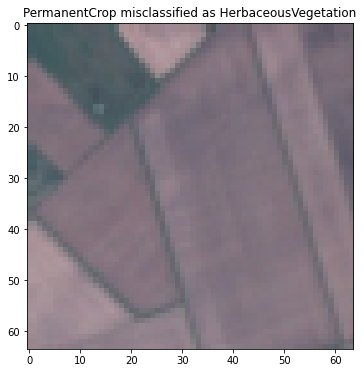

In [141]:
# example of "PermanentCrop" misclassified as "HerbaceousVegetation"
plt.figure(figsize=(6,6))
misclass1 = np.where((y_test==6) & (y_preds == 2))[0][7]
misclass1_img = io.imread(img_files[misclass1])
plt.imshow(misclass1_img)
plt.title("PermanentCrop misclassified as HerbaceousVegetation");

### S7:

- Apply your best model on multispectral images. You may use whichever image channels you wish, so long as you use more than just RGB (although you are not required to use any color channels).

Q7.1: Calculate classification accuracy on the test data.

Q7.2: Compare against results using RGB images.

In [142]:
from tifffile import tifffile

In [143]:
MSdataset = "C:/Users/kchan/Desktop/Spring2022/RemoteSensing/HW/HW4/EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif"

In [144]:
#generate array of filepaths for MS images
MSimg_files = []
for file in glob.glob(MSdataset + os.sep + "*" + os.sep + "*.tif"):
  MSimg_files.append(file)

In [145]:
#load MS images
imgs_ms = []
for MSimgName in MSimg_files:
  tempMS = tifffile.imread(MSimgName)
  imgs_ms.append(tempMS) #append to the feature data set

In [146]:
np.asarray(imgs_ms).shape

(27000, 64, 64, 13)

In [147]:
MSimages = np.stack(imgs_ms)

In [148]:
#slice dataset for desired color channels - Using the agriculture band combination (bands 11, 8 and 2) 
#source: https://gisgeography.com/sentinel-2-bands-combinations/
#used to monitor health of crops because it uses SWIR (B11) and NIR (B8) -- good at highlighting dense vegetation in dark green
Ag_imgChannels = MSimages[:,:,:,[1,7,11]] ## Take all in first three dimensions, and select only three on the forth dimension (of channels)
Ag_imgChannels.shape

(27000, 64, 64, 3)

In [149]:
## applying best model
agX_train, agX_test, agy_train, agy_test = train_test_split(Ag_imgChannels,y,test_size=0.5, random_state=42, stratify=y)

In [150]:
scalar = MinMaxScaler()
scalar.fit(agX_train.reshape(agX_train.shape[0], -1))
agX_train = scalar.transform(agX_train.reshape(agX_train.shape[0], -1)).reshape(agX_train.shape)
agX_test = scalar.transform(agX_test.reshape(agX_test.shape[0], -1)).reshape(agX_test.shape)

In [151]:
m5.fit(agX_train, agy_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(agX_test, agy_test))

Epoch 1/12
211/211 [==============================] - 42s 199ms/step - loss: 1.1750 - accuracy: 0.6986 - val_loss: 0.7343 - val_accuracy: 0.7534
Epoch 2/12
211/211 [==============================] - 45s 214ms/step - loss: 0.6019 - accuracy: 0.7954 - val_loss: 0.6709 - val_accuracy: 0.7674
Epoch 3/12
211/211 [==============================] - 42s 201ms/step - loss: 0.4832 - accuracy: 0.8350 - val_loss: 0.8734 - val_accuracy: 0.7076
Epoch 4/12
211/211 [==============================] - 41s 196ms/step - loss: 0.4338 - accuracy: 0.8510 - val_loss: 0.5225 - val_accuracy: 0.8188
Epoch 5/12
211/211 [==============================] - 43s 202ms/step - loss: 0.3971 - accuracy: 0.8656 - val_loss: 0.6321 - val_accuracy: 0.8052
Epoch 6/12
211/211 [==============================] - 42s 201ms/step - loss: 0.3321 - accuracy: 0.8819 - val_loss: 0.6927 - val_accuracy: 0.7696
Epoch 7/12
211/211 [==============================] - 40s 191ms/step - loss: 0.3181 - accuracy: 0.8868 - val_loss: 0.5244 - val_ac

#### Q7.1 Classification Accuracy using test set:

In [152]:
score = m5.evaluate(agX_test, agy_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6514322757720947
Test accuracy: 0.7854074239730835


#### Q7.2 Compare Ag band combination results to RGB results

In [153]:
#create preds var
m5_Ag_results = m5.predict(agX_test)
agy_preds = np.argmax(m5_Ag_results, axis=1)

In [154]:
cm_Ag = confusion_matrix(agy_test, agy_preds)

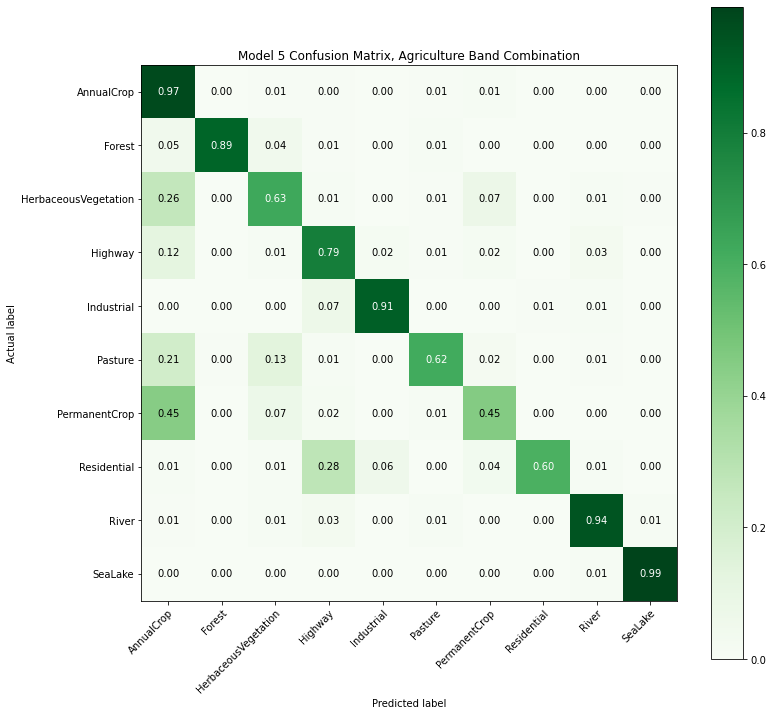

In [158]:
#plot confusion matrix
%matplotlib inline
plt.rcParams['axes.grid'] = False
cm_Ag = cm_Ag.astype('float') / cm_Ag.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(cm_Ag, interpolation = 'nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

#show all ticks
ax.set(xticks = np.arange(cm_Ag.shape[1]),
       yticks = np.arange(cm_Ag.shape[0]),
       xticklabels = labelNames, yticklabels = labelNames,
       title = 'Model 5 Confusion Matrix, Agriculture Band Combination',
       ylabel = 'Actual label',
       xlabel = 'Predicted label')

#set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

#loop over dimensions and create annotations
fmt = '.2f'
thresh = cm_Ag.max()/2
for i in range(cm_Ag.shape[0]): 
    for h in range(cm_Ag.shape[1]):
        ax.text( h, i, format(cm_Ag[i, h], fmt),
        ha = "center", va="center",
        color = "white" if cm_Ag[i, h] > thresh else "black");

For this section, I used the Agriculture band combination of the multispectral image dataset (source: https://gisgeography.com/sentinel-2-bands-combinations/). This band combination consists of bands B11 (SWIR), B8 (NIR), and B2(Blue) and is mostly used to monitor the health of crops as well as highlight dense vegetation. I figured this would be a good combination to use since my model was not able to perform well for annual and permanent crops using the RGB channels. Chlorophyll in the structure of leaves is able to absorb a large majority of light in both the blue and red spectrums. Thus, a healthy leaf is highly reflectant in NIR bands. Additionally water in leaves leads to high reflectance in the SWIR bands. 

My goal was to use these color channels to help identify variances that would be more apparent among the different vegetation classes in this dataset (AnnualCrop, Forest, HerbaceousVegetation, Pasture, PermanentCrop). The B11 SWIR channel also would help predictions for the water classes (River and SeaLake). 

Using these channels lead to a slight improvement with model 5 in accuracy score and a significant improvement with loss scores when compared to model 5 results for RGB images. Additionally, there is a significantly large improvement in predictions for AnnualCrop as shown by the confusion matrix above. The predictions for PermanentCrop improved as well. 

However, using the agriculture band combination allowed for slight decreases in accuracy for a few of the other classes (i.e. Forest, Pasture, Residential). It is important to consider how these predicted classifications may be applied in order to determine which color channels to use with this model. For the goal of improving predictions of AnnualCrop and PermanentCrop, these color channels yield better results than the RGB color channels.